# Import necessary dependinces and data

In [ ]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 1.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=c889139770d129fa41d67169e388c3f2b4f2fde4cb55a37122e2ae8f97e7c3bb
  Stored in directory: /root/.cache/pip/wheels/81/f2/e0/d578821d723b473d18610ea93810e4a5402463919f07e603d9
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperframe

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
!pip install stop_words

  Preparing metadata (setup.py) ... done
  Created wheel for stop_words: filename=stop_words-2018.7.23-py3-none-any.whl size=32894 sha256=a78df433f5c715157fe1b9e39adcfcca0d4c840ee15f41cacd8b1d25e2eef9b2
  Stored in directory: /root/.cache/pip/wheels/8f/a5/51/a5405e1da5d178491b79d12cc81b6cb9bb14fe2c8c632eba70
Successfully built stop_words


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from googletrans import Translator
from tqdm.notebook import tqdm

# from googletrans import Translator
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

import gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import NMF
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
main_df = pd.read_csv("/content/drive/MyDrive/STALKER_clear_videos.csv")
df = pd.read_csv("/content/drive/MyDrive/STALKER_clear_comments.csv")

main_df["published_at"] = pd.to_datetime(main_df["published_at"])
df["published_at"] = pd.to_datetime(df["published_at"])

In [ ]:
main_df.head()

,id,video_title,video_id,published_at,channel_name,views_count,like_count,comment_count
0,0,S.T.A.L.K.E.R. 2 – Trailer #1,r4xyN1n7ysQ,2020-07-23,GSC Game World,1075932,56903,7885
1,1,S.T.A.L.K.E.R. 2 – Skif,9avKD9rC318,2020-12-31,GSC Game World,782149,52295,4587
2,2,S.T.A.L.K.E.R. 2: Сердце Чернобыля — Официальн...,ZNLaKOlXVvw,2021-06-13,GSC Game World,2503274,153106,21771
3,3,S.T.A.L.K.E.R. 2: Heart of Chornobyl — Enter t...,4PqR5OBb1Ys,2022-06-14,GSC Game World,738160,32351,8170
4,4,S.T.A.L.K.E.R. 2: Heart of Chornobyl — Come to...,BB87nZ2Wldg,2022-12-29,GSC Game World,1431929,67605,13046


In [ ]:
df.head()

,id,author,published_at,like_count,text,reply_count,text_fasttext,sentence_length,words_num
0,0,@prauwnsauce,2024-11-11,1.0,slava ukraini more days,0.0,en,23,4
1,0,@Er3n_Jaeger_1,2024-11-11,1.0,days,0.0,en,4,1
2,0,@vitalii3143,2024-11-10,0.0,weve nearly done it days left guys,0.0,en,34,7
3,0,@antianonym376,2024-11-09,0.0,days,0.0,en,4,1
4,0,@gunnarthesabercat7853,2024-10-24,0.0,the zone is coming just a few more days,0.0,en,39,9


# EDA

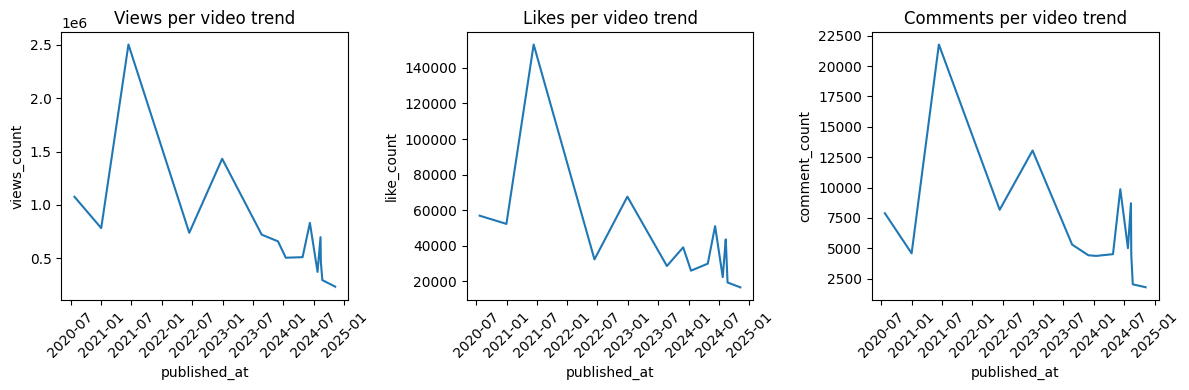

In [ ]:
# let's plot trends
f, ax = plt.subplots(1, 3, figsize=(12, 4))

sns.lineplot(data=main_df, x="published_at", y="views_count", ax=ax[0])
ax[0].set_title("Views per video trend")
ax[0].tick_params(axis="x", rotation=45)

sns.lineplot(data=main_df, x="published_at", y="like_count", ax=ax[1])
ax[1].set_title("Likes per video trend")
ax[1].tick_params(axis="x", rotation=45)

sns.lineplot(data=main_df, x="published_at", y="comment_count", ax=ax[2])
ax[2].set_title("Comments per video trend")
ax[2].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

As we can see that hype around trailers is gradually falling, this is not a big surprise, since the first trailers marked the return of the world of STALKER, which caused the greatest excitement. Let's compare relative activity indicators under the videos.

In [ ]:
# relative activity indicators
main_df["like_per_view"] = main_df["like_count"]/main_df["views_count"]
main_df["comment_per_view"] = main_df["comment_count"]/main_df["views_count"]

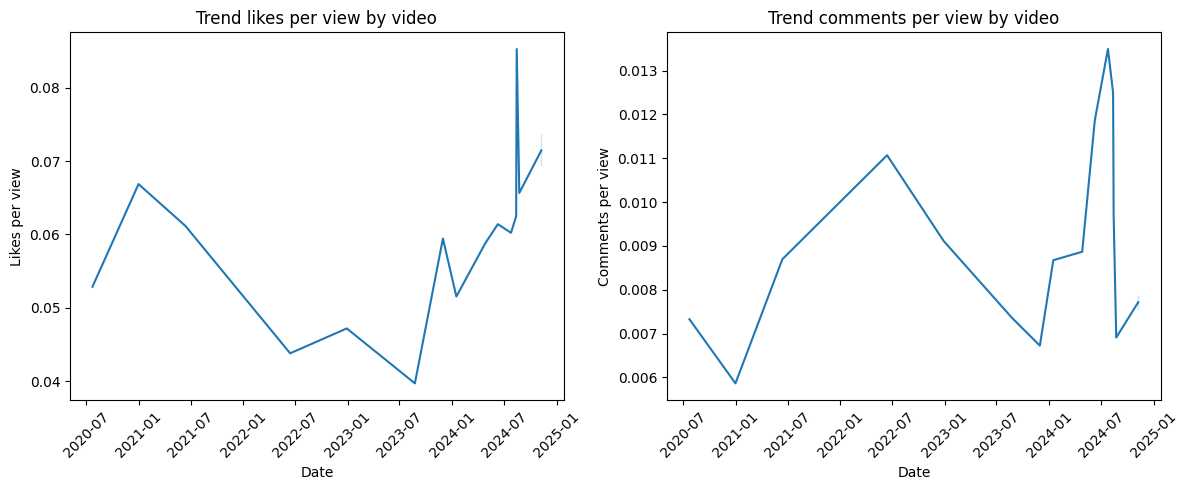

In [ ]:
# let's plot trends
f, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(data=main_df, x="published_at", y="like_per_view", ax=ax[0])
ax[0].set_title("Trend likes per view by video")
ax[0].tick_params(axis="x", rotation=45)
ax[0].set_ylabel("Likes per view")
ax[0].set_xlabel("Date")

sns.lineplot(data=main_df, x="published_at", y="comment_per_view", ax=ax[1])
ax[1].set_title("Trend comments per view by video")
ax[1].tick_params(axis="x", rotation=45)
ax[1].set_ylabel("Comments per view")
ax[1].set_xlabel("Date")
plt.tight_layout()
plt.show()

The last significant peak in relative metrics refers to the video S.T.A.L.K.E.R.2: Heart of Chornobyl - World & Locations, where players were introduced to the world of the game. As we can see, this really excited users.

In [ ]:
# let's see how many coments left after my preprocessing thing
temp1 = df.groupby("id")["text"].count().reset_index()
temp2 = temp1.merge(df.groupby("id")["reply_count"].sum().reset_index(),
                    left_on="id", right_on="id")
temp2["clear_comments"] = temp2["text"] + temp2["reply_count"]
temp2.drop(columns=["text", "reply_count"], inplace=True)

main_df = main_df.merge(temp2, left_on="id", right_on="id")

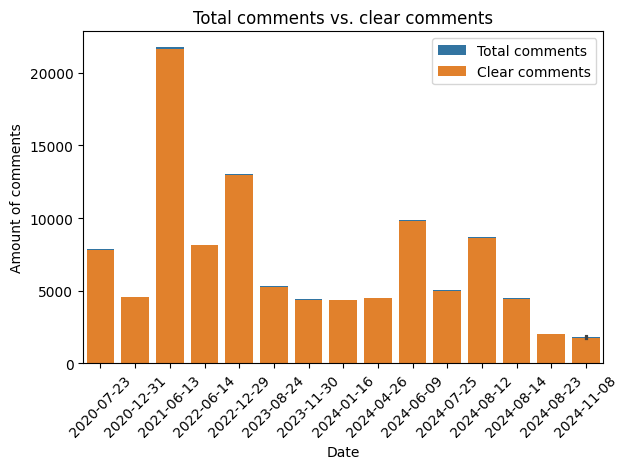

In [ ]:
sns.barplot(data=main_df, x="published_at", y="comment_count",
             label="Total comments")
sns.barplot(data=main_df, x="published_at", y="clear_comments",
             label="Clear comments")
plt.title("Total comments vs. clear comments")
plt.xlabel("Date")
plt.ylabel("Amount of comments")
plt.tick_params(axis="x", rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

We see that from preprocessing we lost not really much and also as we have the large number of languages, let's focus on the main ones, like english, ukrainian, russian and other and check amount of specific language trend.

In [ ]:
# let's write a simple function for sorting comments be language
def language_classifier(label):
  if label == "en":
    return "Englsih"
  elif label == "uk":
    return "Ukrainian"
  elif label == "ru":
    return "russian"
  else:
    return "Other"

In [ ]:
df["text_classifier"] = df["text_fasttext"].apply(lambda label: language_classifier(label))

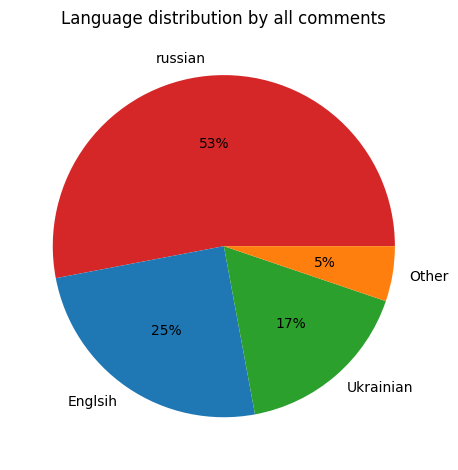

In [ ]:
temp_3 = df.groupby("text_classifier").size().reset_index().sort_values(by=0, ascending=False)
default_colors = plt.cm.tab10.colors
colors = [default_colors[3], default_colors[0], default_colors[2], default_colors[1]]
plt.pie(temp_3[0], labels = temp_3["text_classifier"], colors=colors, autopct='%.0f%%')
plt.title("Language distribution by all comments")
plt.tight_layout()
plt.show()

Yeah, we see that comments in other language are minority. The best way to deal with them is to analyze them and possibly remove them for better sentiment analysis

In [ ]:
# build temporary table
temp_df = df.groupby(["id", "text_classifier"]).size().reset_index()

gsc_comment_df = temp_df.merge(main_df, how="right", left_on="id", right_on="id")
gsc_comment_df.rename(columns={0: "lan_comment_count"}, inplace=True)
gsc_comment_df["published_at"] = gsc_comment_df["published_at"].dt.date

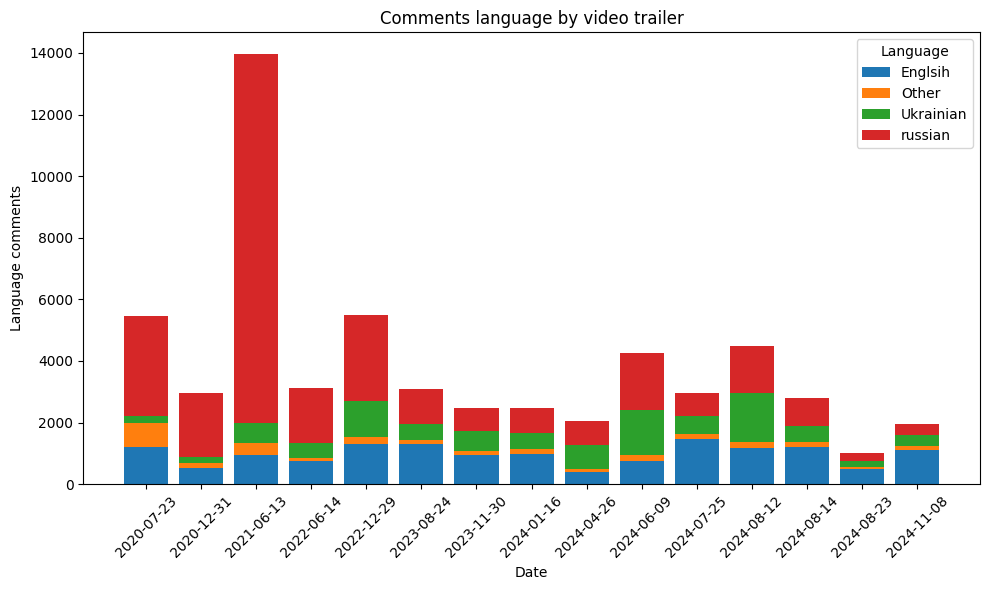

In [ ]:
grouped = gsc_comment_df.groupby(["published_at", "text_classifier"])["lan_comment_count"].sum().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))
x_positions = range(len(grouped.index))
bottoms = [0] * len(grouped.index)

for category in grouped.columns:
    ax.bar(x_positions, grouped[category], label=category, bottom=bottoms)
    bottoms += grouped[category]

ax.set_xticks(x_positions)
ax.set_xticklabels(bottoms.index, rotation=45)
ax.set_title("Comments language by video trailer")
ax.set_xlabel("Date")
ax.set_ylabel("Language comments")
ax.legend(title="Language")

plt.tight_layout()
plt.show()

So, what is interesting is that over time the share of comments in russian falls, which is closely related to the GSC policy.

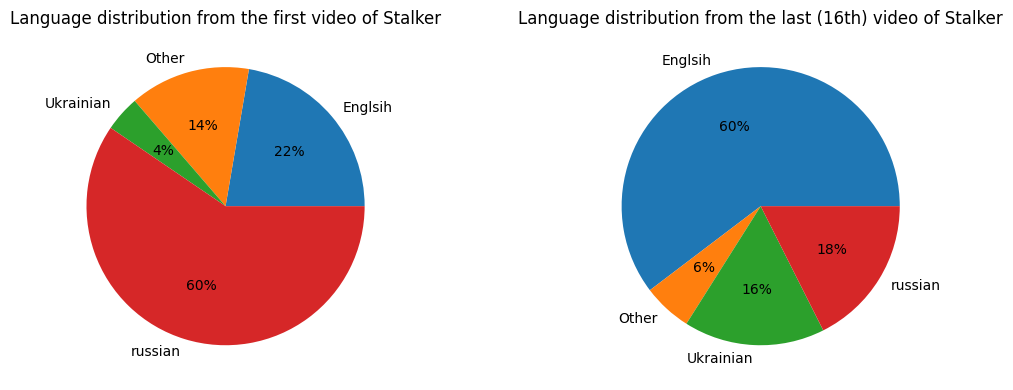

In [ ]:
temp_4 = gsc_comment_df[gsc_comment_df["id"] == 0]
temp_5 = gsc_comment_df[gsc_comment_df["id"] == 15]

f, ax = plt.subplots(1, 2, figsize=(12, 4))
colors = [default_colors[0], default_colors[1], default_colors[2], default_colors[3]]
ax[0].pie(temp_4["lan_comment_count"], labels = temp_4["text_classifier"], colors=colors, autopct='%.0f%%')
ax[1].pie(temp_5["lan_comment_count"], labels = temp_5["text_classifier"], colors=colors, autopct='%.0f%%')

ax[0].set_title("Language distribution from the first video of Stalker")
ax[1].set_title("Language distribution from the last (16th) video of Stalker")
plt.tight_layout()
# plt.legend()
plt.show()

From this last graph we see that amount of "other" comments not really high, we can deep into and see the specific of data, but for sentiment analysis we stop on that three language and see that sentiments.

In [ ]:
df[df["text_classifier"]=="Other"].head()

,id,author,published_at,like_count,text,reply_count,text_fasttext,sentence_length,words_num,text_classifier
28,0,@StronciY_90,2023-08-12,13.0,shit prewie shit rusofobia,7.0,es,26,4,Other
54,0,@nightmarevstplugin3944,2022-07-16,0.0,jio,0.0,eo,3,1,Other
59,0,@KILLDOZZER,2022-06-16,0.0,hah,0.0,sl,3,1,Other
69,0,@vadyastreb,2022-04-10,6.0,да чо за хуйню вы несете,0.0,bg,24,6,Other
197,0,@Каррдэ,2022-01-12,0.0,жду stalker,0.0,kk,11,2,Other


we that even here we get some wrong classification, like for example in 4th row model indentify this comment like bulgarian, but it's clearly russian, so for better perfomance we just drop this data.

In [ ]:
df[df["text_classifier"]=="Other"].groupby("text_fasttext").size().reset_index().sort_values(by=0, ascending=False).head()

,text_fasttext,0
46,kk,632
24,es,317
20,de,262
7,bg,254
73,pl,185


As you can see, the top 5 languages ​​from the other subcategory are Kazakh, Spanish, German, Bulgarian and Polish. And the last one have during 16 videos only 185 comments what not really much.

In [ ]:
new_df = df[~(df["text_classifier"]=="Other")]

In [ ]:
# and also let's get rid off big sentences like more than 180 words
new_df = new_df[new_df["words_num"] < 180]
new_df = new_df[~(new_df["sentence_length"] > 2000)]

In [ ]:
temp1 = new_df.groupby("id")["text"].count().reset_index()
temp2 = temp1.merge(df.groupby("id")["reply_count"].sum().reset_index(),
                    left_on="id", right_on="id")
temp2["three_language"] = temp2["text"] + temp2["reply_count"]
temp2.drop(columns=["text", "reply_count"], inplace=True)

main_df = main_df.merge(temp2, left_on="id", right_on="id")

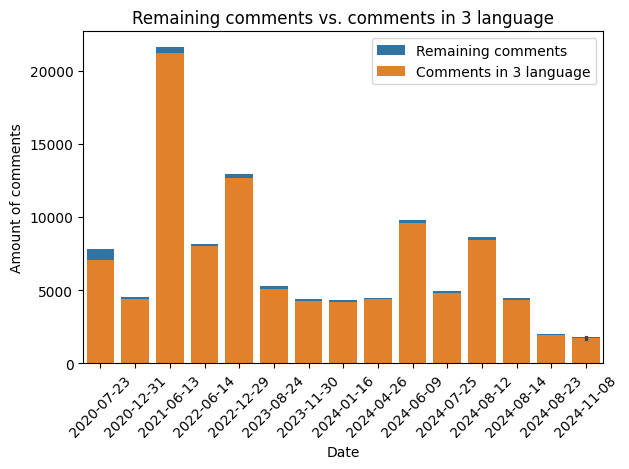

In [ ]:
sns.barplot(data=main_df, x="published_at", y="clear_comments",
             label="Remaining comments")
sns.barplot(data=main_df, x="published_at", y="three_language",
             label="Comments in 3 language")
plt.title("Remaining comments vs. comments in 3 language")
plt.xlabel("Date")
plt.ylabel("Amount of comments")
plt.tick_params(axis="x", rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Sentiment analysis

As we have three language in our dataset that means we are dealing with multilingual sentiment analysis problem. In this situation we can use two ways. Plan A: we can find pre-traind sentiment analysis model for each language and implement them and Plan B: is to reduce everything to one language (English) and pre-train the model only. So in firstly, i really know pre-trained sentiment analysis models only for russian (https://huggingface.co/seara/rubert-tiny2-russian-sentiment) and Englsih (https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment), but can't find something in Ukrainian, so i'm going implement plan B.

In [ ]:
# translator
def translate_in_eng (translator, text_string: str):
  translation = translator.translate(text_string, dest="en")
  return translation.text

In [ ]:
def get_translate(translator, text: str, language: str):
  if language == "en":
    return text
  else:
    new_text = translate_in_eng(translator=translator, text_string=text)
    return new_text

In [ ]:
translator = Translator()

tqdm.pandas()
new_df["translated_text"] = new_df.progress_apply(
    lambda row: get_translate(translator, row["text"], row["text_fasttext"]),
    axis=1
)

  0%|          | 0/55311 [00:00<?, ?it/s]

Then as we have translated text we can implement roberta model for sentiment analysis.

In [ ]:
new_df.head(10)

,id,author,published_at,like_count,text,reply_count,text_fasttext,sentence_length,words_num,text_classifier,translated_text
0,0,@prauwnsauce,2024-11-11,1.0,slava ukraini more days,0.0,en,23,4,Englsih,slava ukraini more days
1,0,@Er3n_Jaeger_1,2024-11-11,1.0,days,0.0,en,4,1,Englsih,days
2,0,@vitalii3143,2024-11-10,0.0,weve nearly done it days left guys,0.0,en,34,7,Englsih,weve nearly done it days left guys
3,0,@antianonym376,2024-11-09,0.0,days,0.0,en,4,1,Englsih,days
4,0,@gunnarthesabercat7853,2024-10-24,0.0,the zone is coming just a few more days,0.0,en,39,9,Englsih,the zone is coming just a few more days
5,0,@Virgil-280,2024-10-04,3.0,it is almost time stalkers prepare yourselves,0.0,en,45,7,Englsih,it is almost time stalkers prepare yourselves
6,0,@w3fkw,2024-09-22,0.0,сталкер ура,0.0,ru,11,2,russian,stalker cheers
7,0,@salty7922,2024-09-16,0.0,holy shit those physics look so good,0.0,en,36,7,Englsih,holy shit those physics look so good
8,0,@Сырок-г6ъ,2024-08-31,3.0,пиздёж чистой воды,0.0,ru,18,3,russian,pure bullshit
9,0,@Shelby19Andrey.,2024-08-23,2.0,как же печально что из за происшествий в мире ...,0.0,ru,79,14,russian,"how sad it is that due to events in the world,..."


## Roberta model

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
# write a simple sentiment function
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors="pt")
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
      "negative" : scores[0],
      "neutral" : scores[1],
      "positive" : scores[2]
  }
  key_result = max(scores_dict, key=scores_dict.get)
  return {"label": key_result, "score": scores_dict[key_result]}

In [ ]:
# this function just for checking of possibility implementation sentiment analysis
def implement_sentiment(text):
  try:
      return polarity_scores_roberta(text)
  except Exception as e:
      return None

In [ ]:
# implement sentiment analysis
tqdm.pandas()
new_df = new_df["translated_text"].progress_apply(lambda text: implement_sentiment(text))

  0%|          | 0/55312 [00:00<?, ?it/s]

In [ ]:
#let's what we get
new_df.head()

,id,author,published_at,like_count,text,reply_count,text_fasttext,sentence_length,words_num,text_classifier,translated_text_x,translated_text_y,sentiment_label,score
0,0,@prauwnsauce,2024-11-11,1.0,slava ukraini more days,0.0,en,23,4,Englsih,slava ukraini more days,"{'label': 'neutral', 'score': 0.8254665}",neutral,0.825466
1,0,@Er3n_Jaeger_1,2024-11-11,1.0,days,0.0,en,4,1,Englsih,days,"{'label': 'neutral', 'score': 0.4806983}",neutral,0.480698
2,0,@vitalii3143,2024-11-10,0.0,weve nearly done it days left guys,0.0,en,34,7,Englsih,weve nearly done it days left guys,"{'label': 'positive', 'score': 0.7123674}",positive,0.712367
3,0,@antianonym376,2024-11-09,0.0,days,0.0,en,4,1,Englsih,days,"{'label': 'neutral', 'score': 0.4806983}",neutral,0.480698
4,0,@gunnarthesabercat7853,2024-10-24,0.0,the zone is coming just a few more days,0.0,en,39,9,Englsih,the zone is coming just a few more days,"{'label': 'neutral', 'score': 0.5718242}",neutral,0.571824


## EDA of sentiment analysis

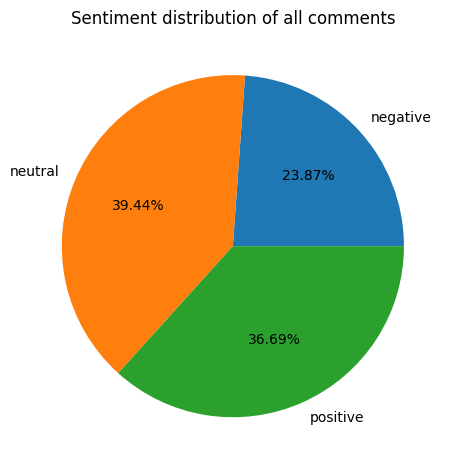

In [ ]:
grouped_sentiment = new_df.groupby("sentiment_label").size().reset_index()
plt.pie(grouped_sentiment[0], labels = grouped_sentiment["sentiment_label"],
        autopct='%.2f%%')
plt.title("Sentiment distribution of all comments")
plt.tight_layout()
plt.show()

In [ ]:
temp_5 = new_df.groupby(["text_classifier", "sentiment_label"]).size().reset_index().rename(columns={0:"comments"})
temp_6 = temp_5.groupby("text_classifier")["comments"].sum().reset_index()
temp_5 = temp_5.merge(temp_6, how="left", left_on="text_classifier", right_on="text_classifier")
temp_5["percent_of_comments"] = temp_5["comments_x"] / temp_5["comments_y"]

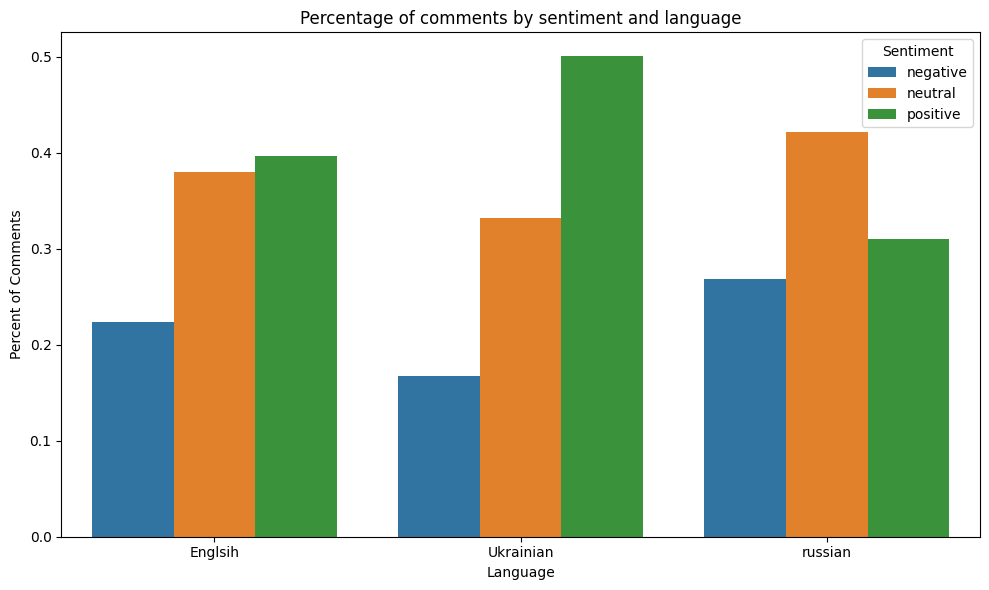

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=temp_5, x="text_classifier",
            y="percent_of_comments",
            hue="sentiment_label")

plt.title("Percentage of comments by sentiment and language")
plt.xlabel("Language")
plt.ylabel("Percent of Comments")
plt.legend(title="Sentiment")

plt.tight_layout()
plt.show()

The highest number of positive comments is in Ukrainian, which is not surprising given that it is a Ukrainian game. Similarly, the highest number of negative comments is in russian. Let's see trend of this.

In [ ]:
temp_7 = new_df.groupby(["id", "sentiment_label"]).size().reset_index().rename(columns={0:"comments"})
temp_7 = temp_7.merge(temp_7.groupby("id")["comments"].sum(), how="inner", left_on="id", right_on="id")
temp_7["percent_of_comments"] = temp_7["comments_x"] / temp_7["comments_y"]

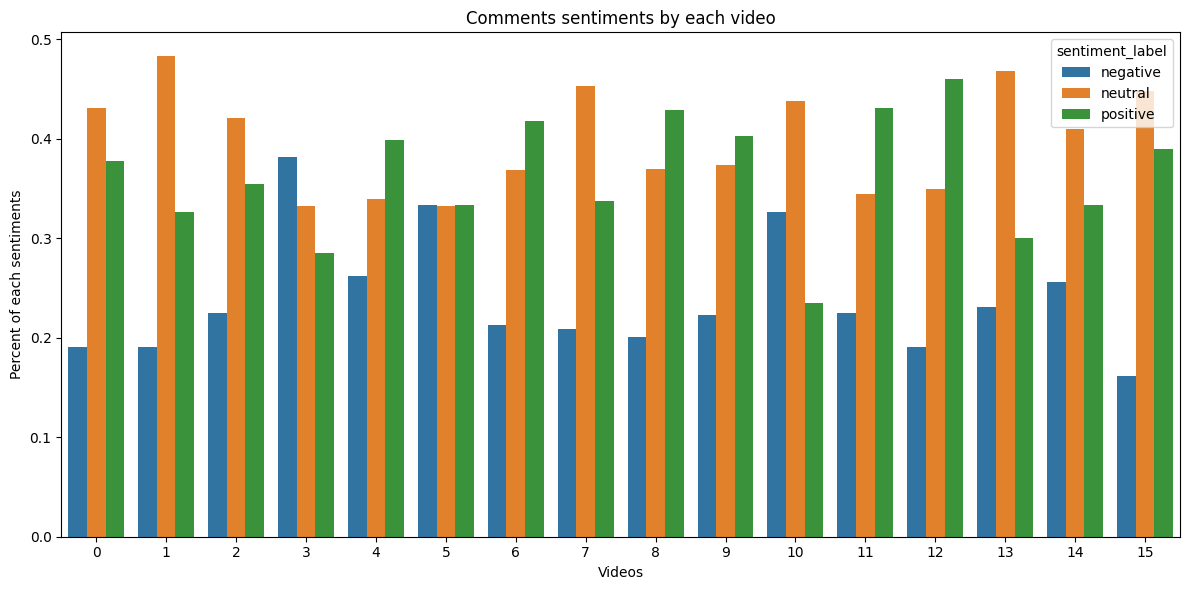

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=temp_7, x="id", y="percent_of_comments", hue="sentiment_label")

plt.title("Comments sentiments by each video")
plt.xlabel("Videos")
plt.ylabel("Percent of each sentiments")
plt.tight_layout()
plt.show()

From this plot we see that in videos with indexes 3, 5 and 10 there are more negative sentiment in the comments than positive ones (we will omit neutral ones for now). Let's see what kind of videos these are..

In [ ]:
print(main_df[main_df["id"]==3].iloc[0, 1])
print("https://www.youtube.com/watch?v=" + main_df[main_df["id"]==3].iloc[0, 2])
print("\n")
print(main_df[main_df["id"]==5].iloc[0, 1])
print("https://www.youtube.com/watch?v=" + main_df[main_df["id"]==5].iloc[0, 2])
print("\n")
print(main_df[main_df["id"]==10].iloc[0, 1])
print("https://www.youtube.com/watch?v=" + main_df[main_df["id"]==10].iloc[0, 2])

S.T.A.L.K.E.R. 2: Heart of Chornobyl — Enter the Zone Trailer
https://www.youtube.com/watch?v=4PqR5OBb1Ys


S.T.A.L.K.E.R. 2: Heart of Chornobyl — Bolts & Bullets Trailer
https://www.youtube.com/watch?v=bcDHClWRHd8


S.T.A.L.K.E.R. 2: Heart of Chornobyl — Really, Again?
https://www.youtube.com/watch?v=vxeGyXSM5Pc


It is interesting that the first two (3, 5) videos have a clearly negative tone, it is difficult to name the reason in this case. However video with id 10 is about the new latest delay of the game's release received the least number of positive comments in each three languages, which is also not entirely surprising and confirms that players are tired of waiting for the game's release.

In [ ]:
temp_8 = new_df.groupby(["id", "text_classifier", "sentiment_label"]).size().reset_index().rename(columns={0:"comments"})
lang_en_temp = temp_8[temp_8["text_classifier"] == "Englsih"]
lang_ua_temp = temp_8[temp_8["text_classifier"] == "Ukrainian"]
lang_ru_temp = temp_8[temp_8["text_classifier"] == "russian"]

lang_en_temp = lang_en_temp.merge(lang_en_temp.groupby(["id"])["comments"].sum(), how="left", left_on="id", right_on="id")
lang_ua_temp = lang_ua_temp.merge(lang_ua_temp.groupby(["id"])["comments"].sum(), how="left", left_on="id", right_on="id")
lang_ru_temp = lang_ru_temp.merge(lang_ru_temp.groupby(["id"])["comments"].sum(), how="left", left_on="id", right_on="id")

lang_en_temp["percent_of_commetns"] = lang_en_temp["comments_x"] / lang_en_temp["comments_y"]
lang_ua_temp["percent_of_commetns"] = lang_ua_temp["comments_x"] / lang_ua_temp["comments_y"]
lang_ru_temp["percent_of_commetns"] = lang_ru_temp["comments_x"] / lang_ru_temp["comments_y"]

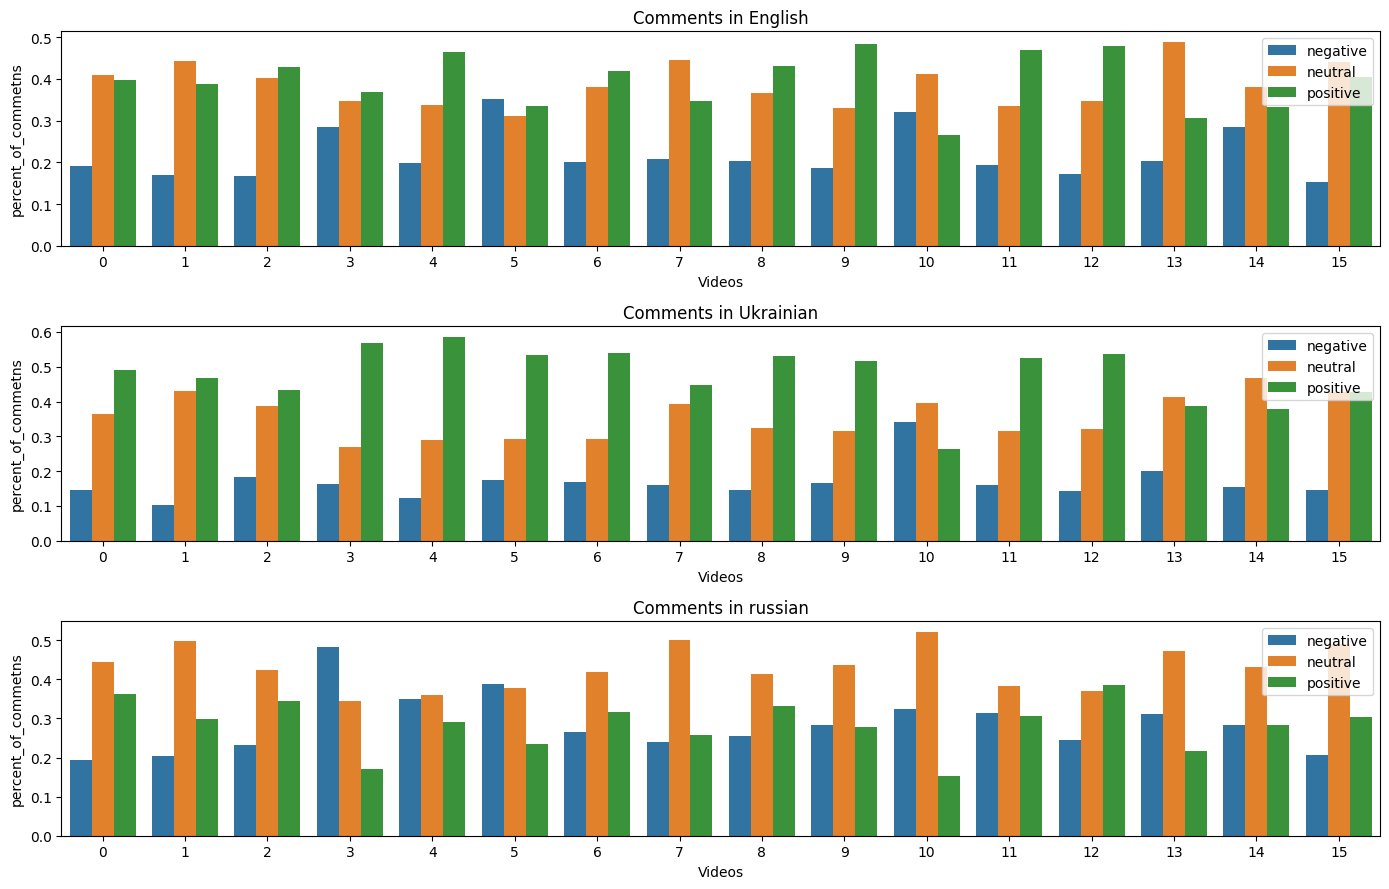

In [ ]:
f, ax = plt.subplots(3, 1, figsize=(14, 9))

sns.barplot(data=lang_en_temp, x="id", y="percent_of_commetns", hue="sentiment_label", ax=ax[0])
ax[0].set_title("Comments in English")
ax[0].set_xlabel("Videos")
ax[0].legend(loc="upper right")

sns.barplot(data=lang_ua_temp, x="id", y="percent_of_commetns", hue="sentiment_label", ax=ax[1])
ax[1].set_title("Comments in Ukrainian")
ax[1].set_xlabel("Videos")
ax[1].legend(loc="upper right")

sns.barplot(data=lang_ru_temp, x="id", y="percent_of_commetns", hue="sentiment_label", ax=ax[2])
ax[2].set_title("Comments in russian")
ax[2].set_xlabel("Videos")
ax[2].legend(loc="upper right")

plt.tight_layout()
plt.show()

From this graphs we see that in 11th (id=10) video we have the smallest number of positive comments by all of three language, let's check what video is it. It can also be said that Ukrainian comments are more positive than negative.

# Topic modeling

Let's analyze the main topics in each video. To start, we'll determine the number of topics in each video by calculating the coherence score.

But as roberta model can work with simple raw text from box we didn't make any preprocessing stuff, however for topic modeling we should build new preprocessing pipeline.

In [ ]:
# Import extra dependencies
import spacy
# from stop_words import get_stop_words
from spacy.lang.en import stop_words
stop_words = stop_words.STOP_WORDS
nlp = spacy.load('en_core_web_sm')

In [ ]:
# simple function to remove punctuation
def remove_punctuation(string, punctuation_to_remove="""#$%"-!&()*+,-./:;<=>?@[\\]^_`{|}~"""):
  return ''.join(char for char in string if char not in punctuation_to_remove)


# make set of stop_words
stop_words.update(['don', 've', 'again️'])
def remove_stop_words(string, stoplist=stop_words):
  doc = nlp(string)  # Process text with spaCy
  return ' '.join(token.text for token in doc if token.text.lower() not in stoplist)


# lemmatization words
def lemmatize(tokens):
  doc = nlp(tokens)
  return ' '.join(token.lemma_ for token in doc)

In [ ]:
new_df['translated_text_x'] = new_df['translated_text_x'].apply(remove_punctuation)

new_df['translated_text_x'] = new_df['translated_text_x'].apply(remove_stop_words)

new_df['translated_text_x'] = new_df['translated_text_x'].apply(lemmatize)

Maximum coherence value for 0-  1


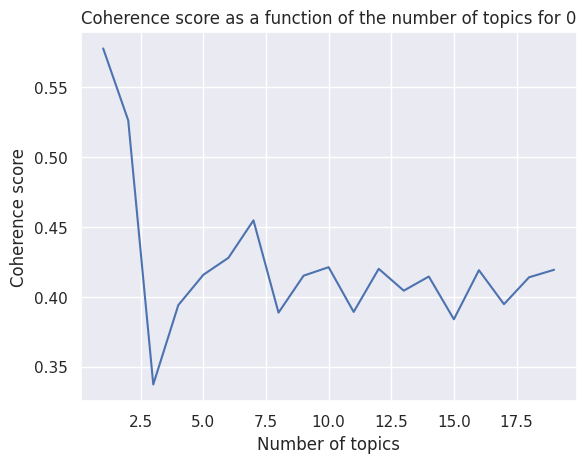

Maximum coherence value for 1-  1


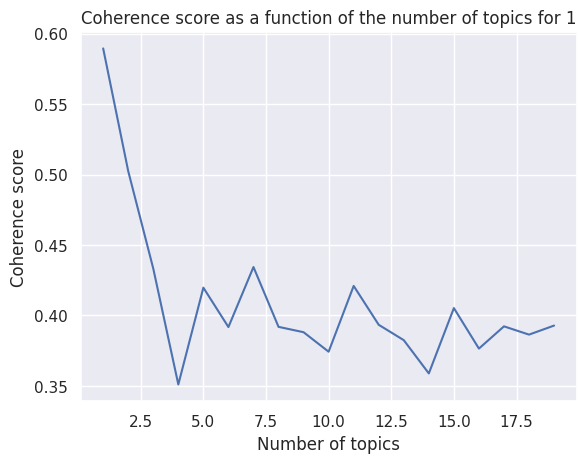

Maximum coherence value for 2-  1


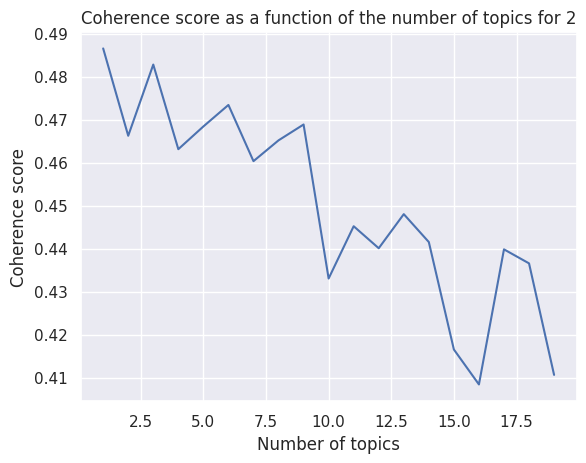

Maximum coherence value for 3-  3


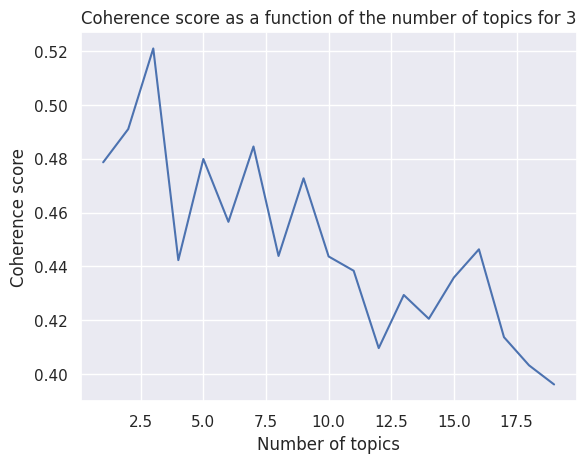

Maximum coherence value for 4-  6


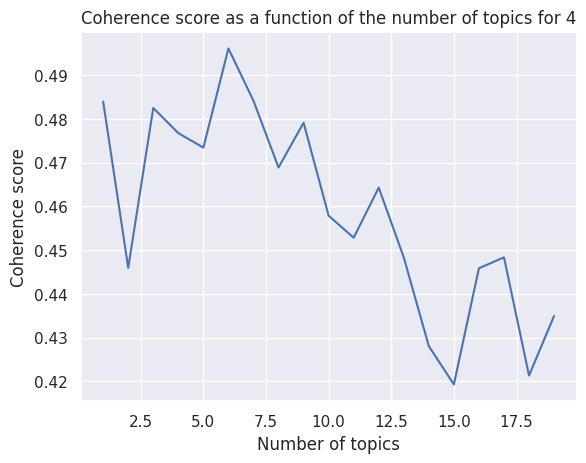

Maximum coherence value for 5-  1


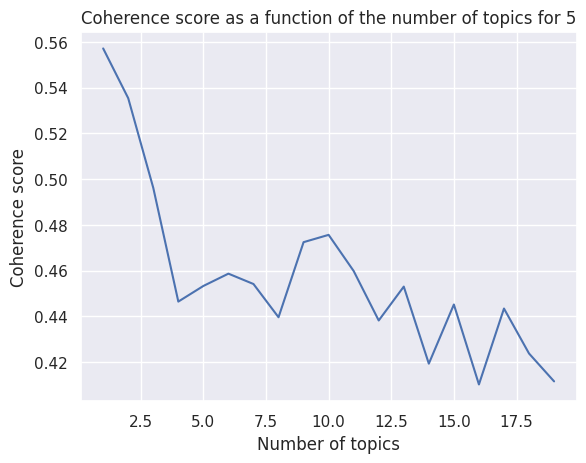

Maximum coherence value for 6-  1


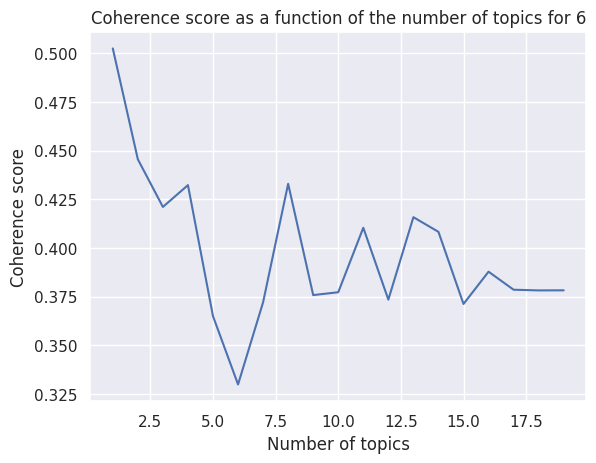

Maximum coherence value for 7-  1


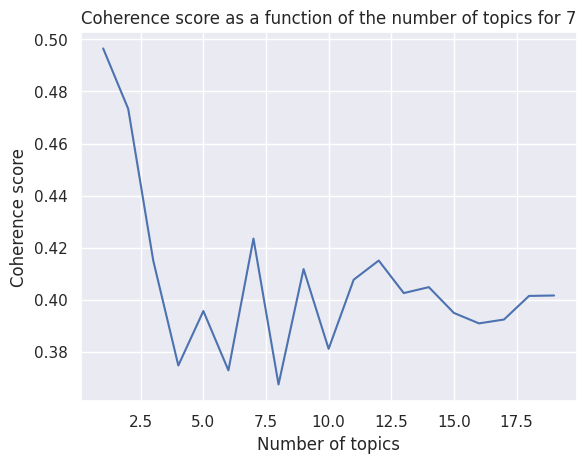

Maximum coherence value for 8-  1


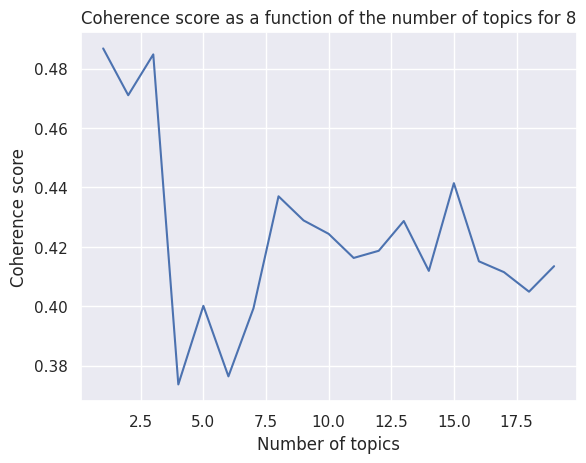

Maximum coherence value for 9-  4


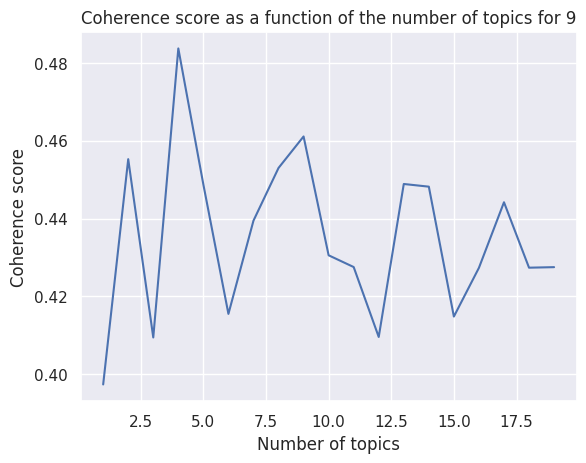

Maximum coherence value for 10-  2


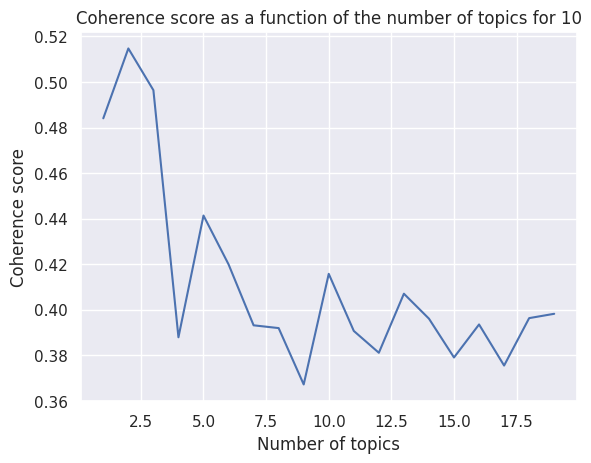

Maximum coherence value for 11-  5


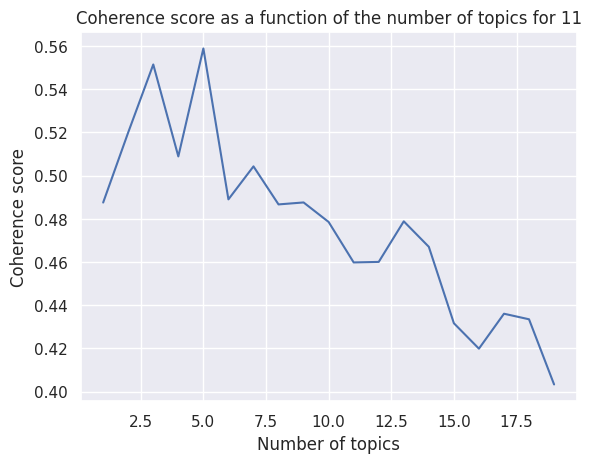

Maximum coherence value for 12-  1


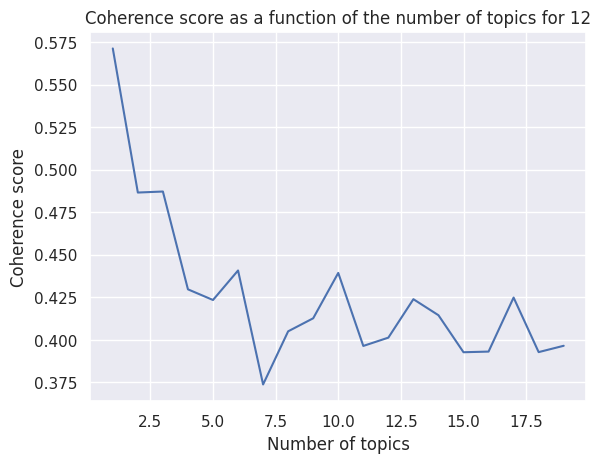

Maximum coherence value for 13-  1


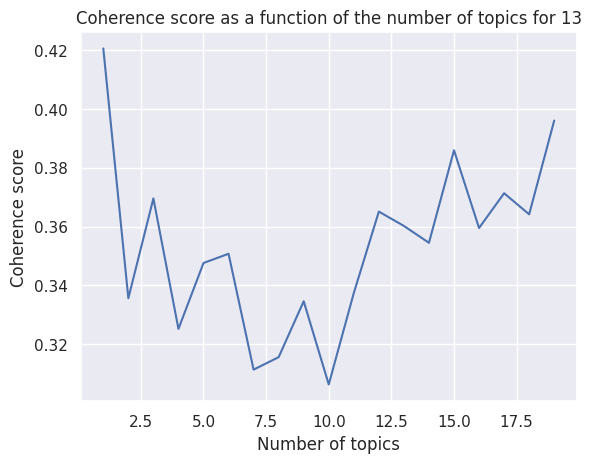

Maximum coherence value for 14-  1


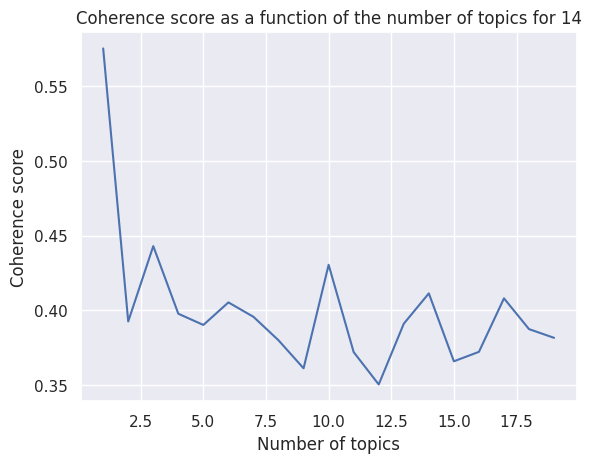

Maximum coherence value for 15-  12


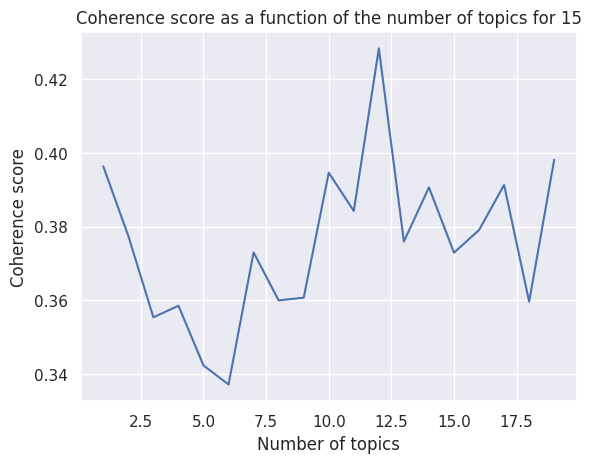

<Figure size 640x480 with 0 Axes>

In [ ]:
min_topics = 1
max_topics = 20

topics_for_video = {}

for video_id in new_df["id"].unique():
  video_comments = new_df[new_df["id"] == video_id]

  text_tokens = [text.split() for text in video_comments["translated_text_x"]]
  dictionary = corpora.Dictionary(text_tokens)

  tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words="english")
  X = tfidf_vectorizer.fit_transform(video_comments["translated_text_x"])

  # code for finding number of topics with max coherence score
  coherence_score = []
  for n_topics in range(min_topics, max_topics):
    lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42, n_jobs=-1)
    lda_model.fit(X)
    doc_topic_dist = lda_model.transform(X)
    topic_word_dist = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis]
    top_words = [[tfidf_vectorizer.get_feature_names_out()[j] for j in topic.argsort()[:-11:-1]] for topic in topic_word_dist]
    cm = CoherenceModel(topics=top_words, texts=text_tokens, dictionary=dictionary, coherence='c_v')
    coherence_score.append(cm.get_coherence())

  max_index = np.argmax(coherence_score)
  max_index_plus_one = max_index + 1
  topics_for_video[video_id] = max_index_plus_one

  print(f"Maximum coherence value for {video_id}- ", max_index_plus_one)

  sns.set()
  plt.plot(range(min_topics, n_topics+1), coherence_score)
  plt.xlabel("Number of topics")
  plt.ylabel("Coherence score")
  plt.title(f"Coherence score as a function of the number of topics for {video_id}")
  plt.show()
  plt.clf()

Let's see the words for each topic for the video.

In [ ]:
for video_id, n_topics in topics_for_video.items():
  video_comments = new_df[new_df["id"] == video_id]["translated_text_x"]
  tfidf_vec = TfidfVectorizer(max_df=0.95, min_df=2, stop_words="english")
  dtm = tfidf_vec.fit_transform(video_comments)

  nmf_model = NMF(n_components=n_topics, random_state=42)
  nmf_model.fit(dtm)

  for index, topic in enumerate(nmf_model.components_):
    print(f"Video ID: {video_id}")
    print(f"THE TOP 15 WORDS FOR TOPIC # {index}")
    print([tfidf_vec.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print("\n")
    print("\n")

Video ID: 0
THE TOP 15 WORDS FOR TOPIC # 0
['come', 'good', 'finally', 'trailer', 'game', 'year', 'chernobyl', 'heart', 'stalker', 'wait']




Video ID: 1
THE TOP 15 WORDS FOR TOPIC # 0
['come', 'good', 'release', 'look', 'new', 'like', 'game', 'year', 'stalker', 'wait']




Video ID: 2
THE TOP 15 WORDS FOR TOPIC # 0
['new', 'waiting', 'countdown', 'year', 'stalker', 'leave', 'chernobyl', 'day', 'heart', 'wait']




Video ID: 3
THE TOP 15 WORDS FOR TOPIC # 0
['language', 'ukrainian', 'like', 'look', 'stalker', 'act', 'trailer', 'voice', 'game', 'russian']




Video ID: 3
THE TOP 15 WORDS FOR TOPIC # 1
['win', 'masterpiece', 'work', 'cool', 'victory', 'guy', 'russia', 'thank', 'ukraine', 'glory']




Video ID: 3
THE TOP 15 WORDS FOR TOPIC # 2
['stalker', 'safe', 'work', 'long', 'release', 'game', 'guy', 'year', 'thank', 'wait']




Video ID: 4
THE TOP 15 WORDS FOR TOPIC # 0
['trailer', 'understand', 'subtitle', 'acting', 'english', 'language', 'ukrainian', 'act', 'voice', 'russian']





So we see that each video has a different number of topics, which can show how the audience perceived each video. We can see how people have been waiting for the game for a long time and desperately, and we can also see political and war topics being raised in the comments. As a result, we see swings in user sentiment in the comments during the all stalker marketing campaign.

In [ ]:
# save dataset fot future task
pd.to_csv("/content/drive/MyDrive/STALKER_comments_ver_0.csv")

---
DONE!